In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

In [ ]:
#df=pd.read_csv("https://raw.githubusercontent.com/benjamin-chan/MedicareProviderCharge/master/Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv")
#df.to_csv('medicare_drg.csv', index=False)
df=pd.read_csv('medicare_drg.csv')
df.reset_index()
df=df.dropna()
df['DRG']=df['DRG Definition'].str[:3]
df['DRG']=df['DRG'].astype('category')
df['Provider State']=df['Provider State'].astype('category')
filter =df['DRG'].isin(['682','683','684'])

encoder=LabelEncoder()

df['Provider State Enc']=encoder.fit_transform(df['Provider State'])


In [ ]:
print(df.columns)

In [ ]:
print(df['DRG Definition'].unique())

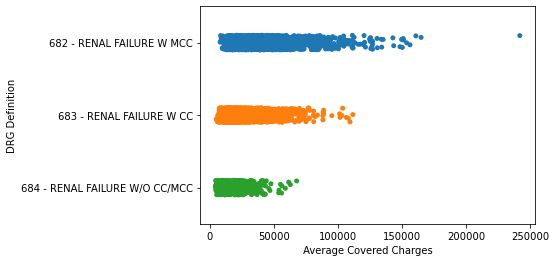

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


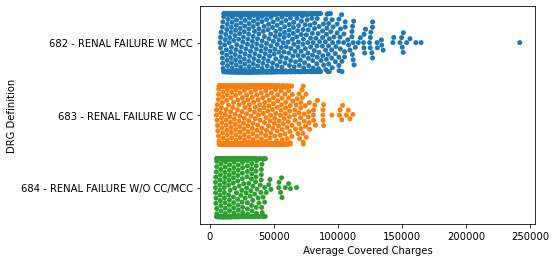

In [70]:
#print(df['DRG'])

#dict={" Average Covered Charges ":"Average Covered Charges"}

#df=df.rename(columns=dict,inplace=True)
#print(df)


#print(df[filter])
sns.stripplot(data=df[filter], y="DRG Definition", x=" Average Covered Charges ",jitter=True)
plt.show()

sns.swarmplot(data=df[filter], y="DRG Definition", x=" Average Covered Charges ")
plt.show()



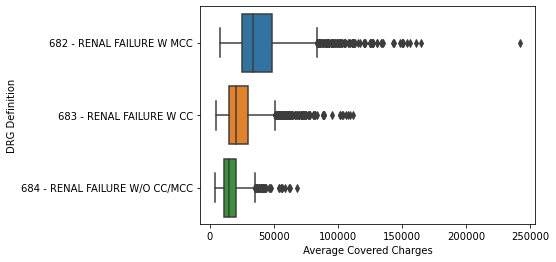

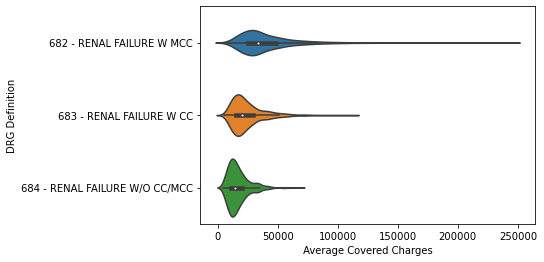

In [80]:
sns.boxplot(data=df[filter], y="DRG Definition", x=" Average Covered Charges ")
plt.show()

sns.violinplot(data=df[filter],y="DRG Definition", x=" Average Covered Charges ")
plt.show()

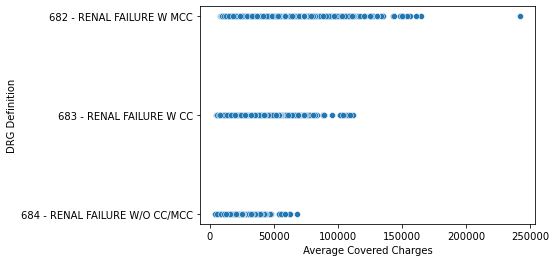

In [81]:
sns.scatterplot(data=df[filter],y="DRG Definition", x=" Average Covered Charges ")
plt.show()

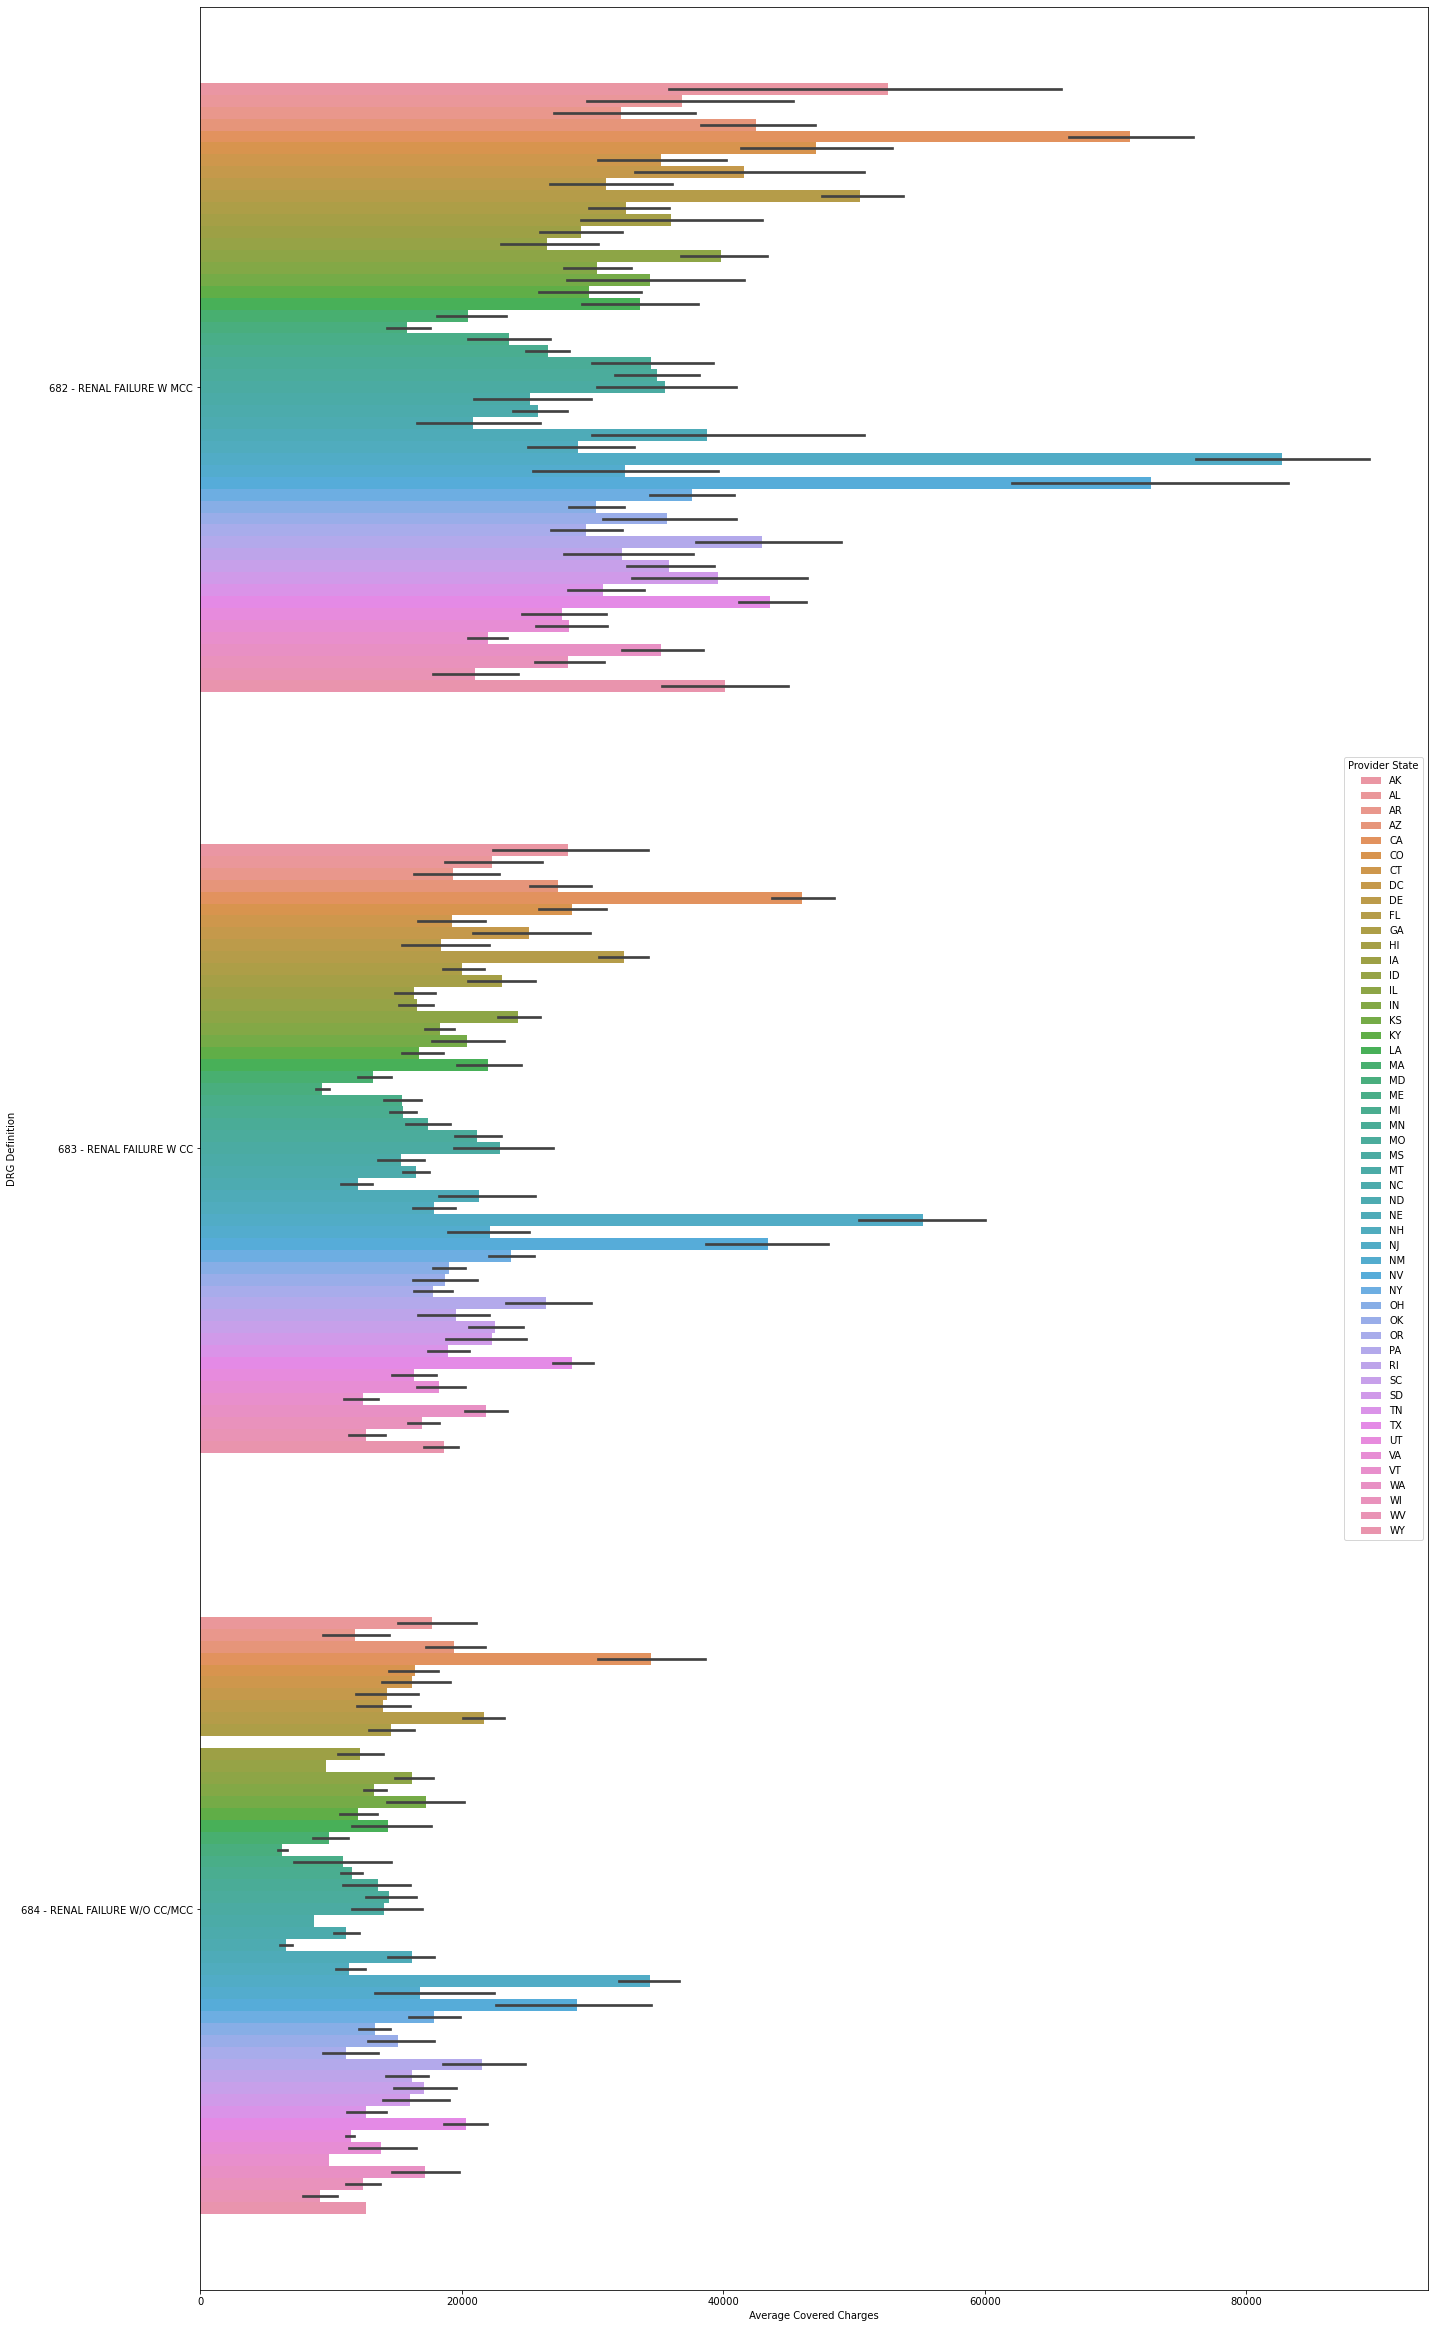

medicare costs vary from state to state


In [51]:
plt.figure(figsize=(22,42))

sns.barplot(data=df[filter], y="DRG Definition", x=" Average Covered Charges ", hue='Provider State')
plt.show()

print("medicare costs vary from state to state")

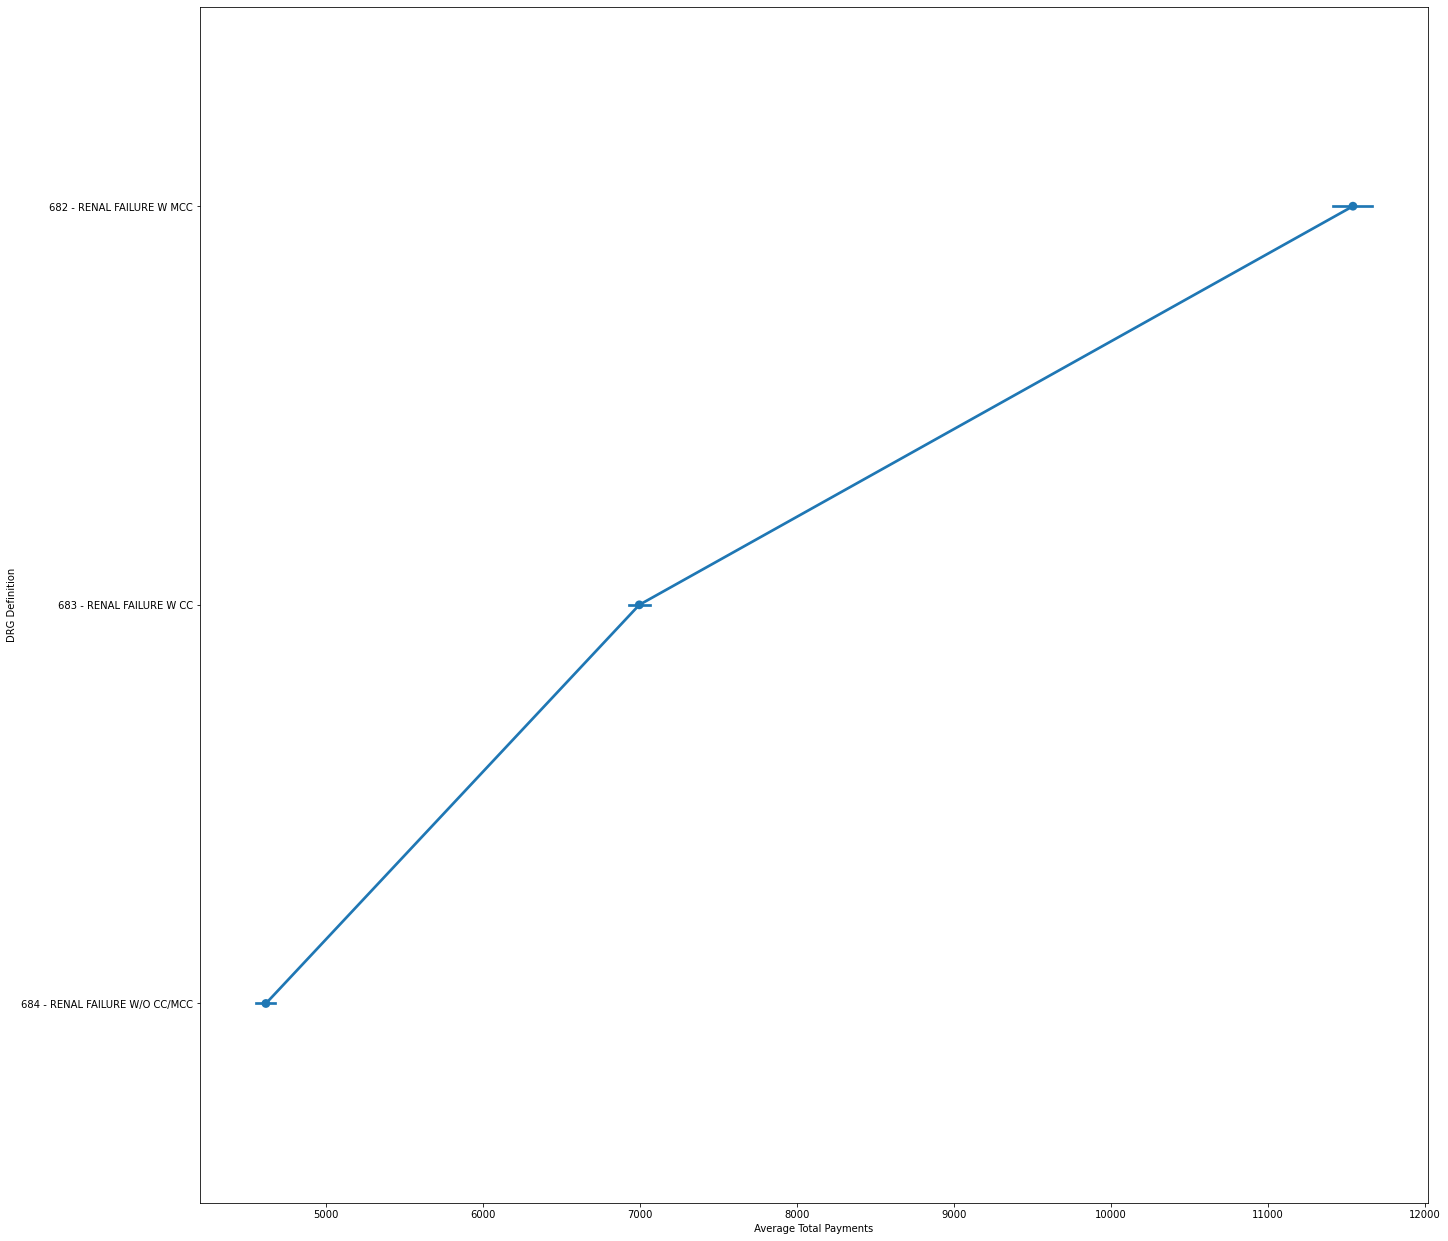

In [52]:
plt.figure(figsize=(22,22))
sns.pointplot(data=df[filter], y="DRG Definition", x=" Average Total Payments ")
plt.show()

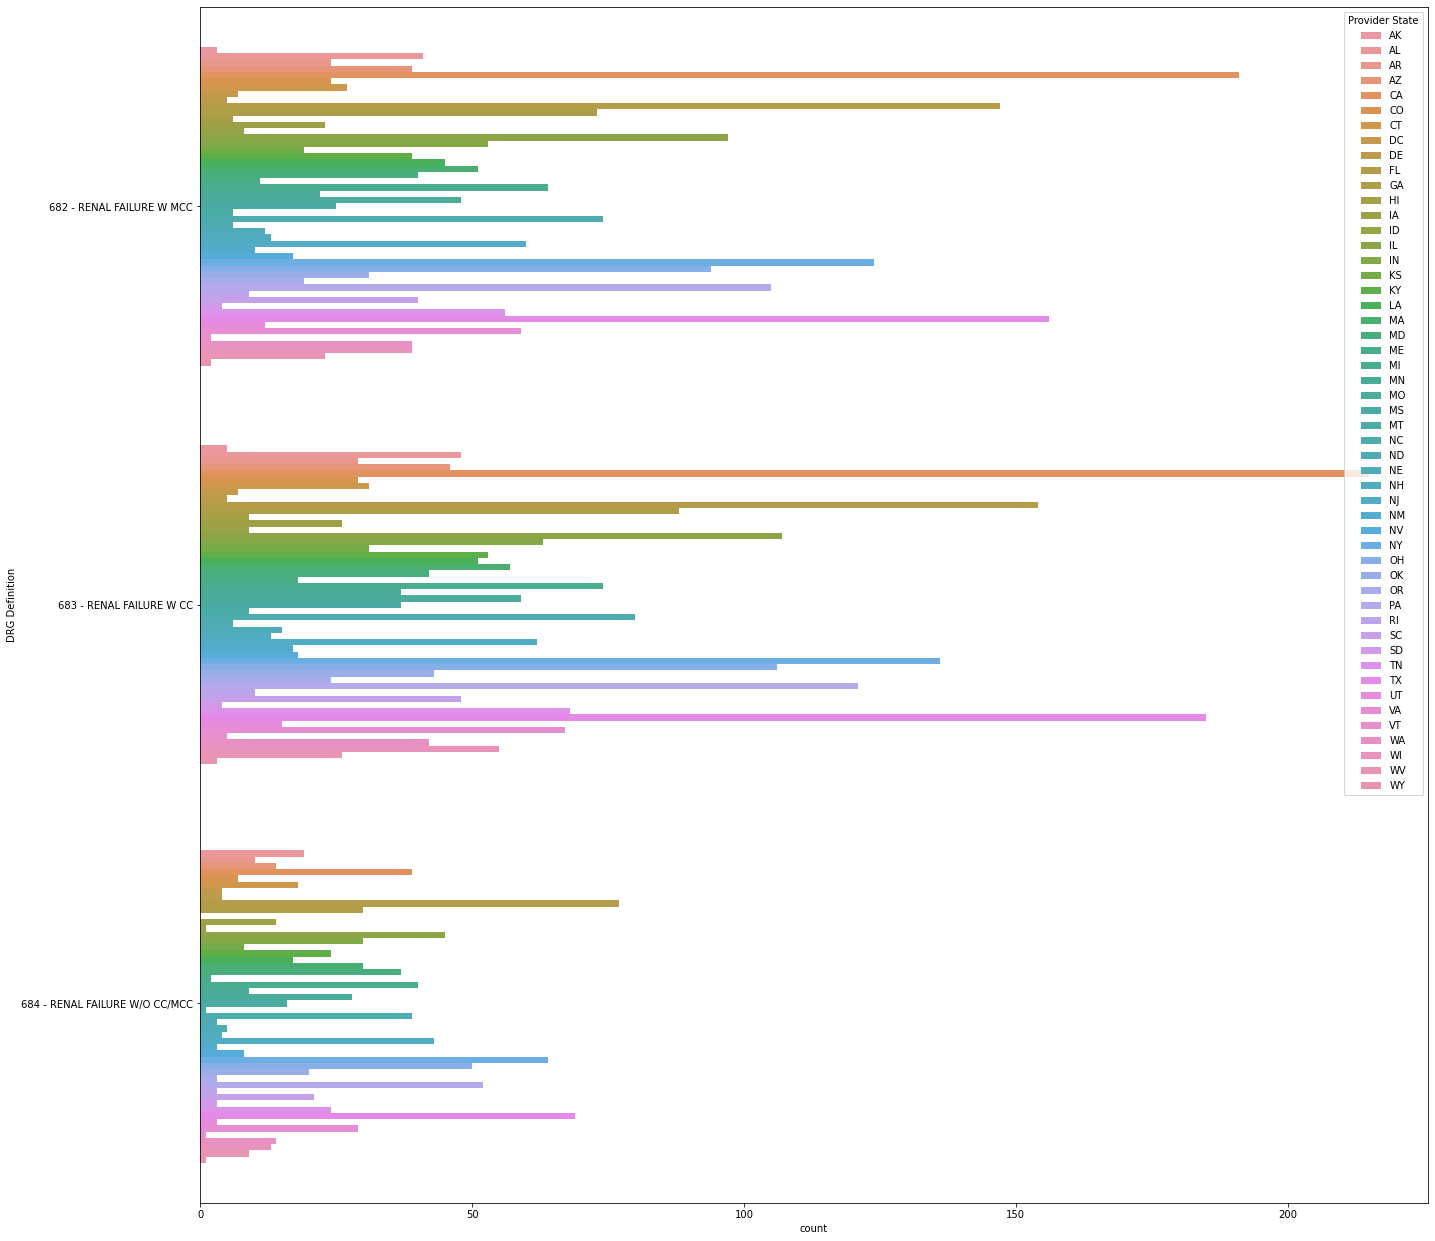

In [53]:
plt.figure(figsize=(22,22))

sns.countplot(data=df[filter], y="DRG Definition", hue='Provider State')
plt.show()

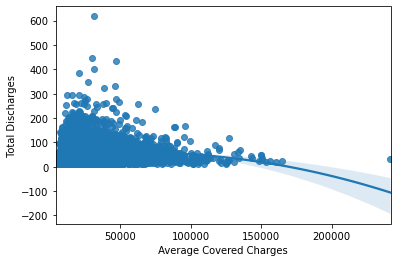

In [54]:

sns.regplot(data=df[filter], y=' Total Discharges ', x=" Average Covered Charges ", order=2)
plt.show()

#order greater than 1 will create a polynomial

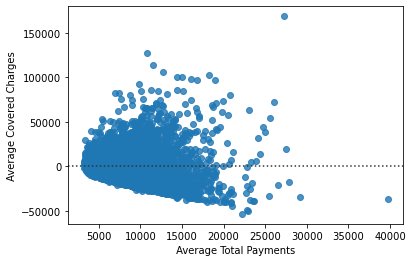

In [55]:
sns.residplot(data=df[filter],y=' Average Covered Charges ',
       x=' Average Total Payments ', order=2)
plt.show()

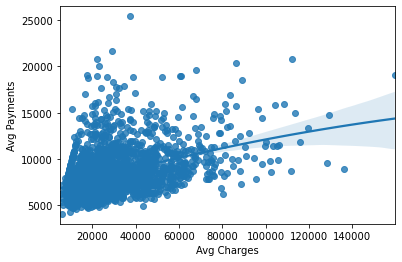

In [56]:
providers_avg_charges=df[filter].groupby('Provider Name')[' Average Covered Charges '].mean()

providers_avg_payments=df[filter].groupby('Provider Name')[' Average Total Payments '].mean()


result=pd.DataFrame({'Avg Charges':providers_avg_charges,'Avg Payments': providers_avg_payments})

#for key,item in result.iterrows():
#    print(item)

sns.regplot(data=result,x='Avg Charges',
       y='Avg Payments', order=2)
plt.show()


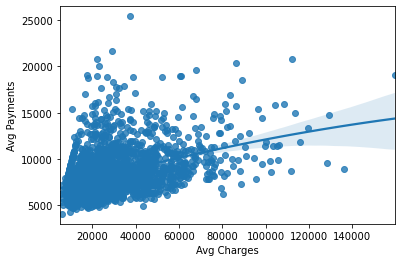

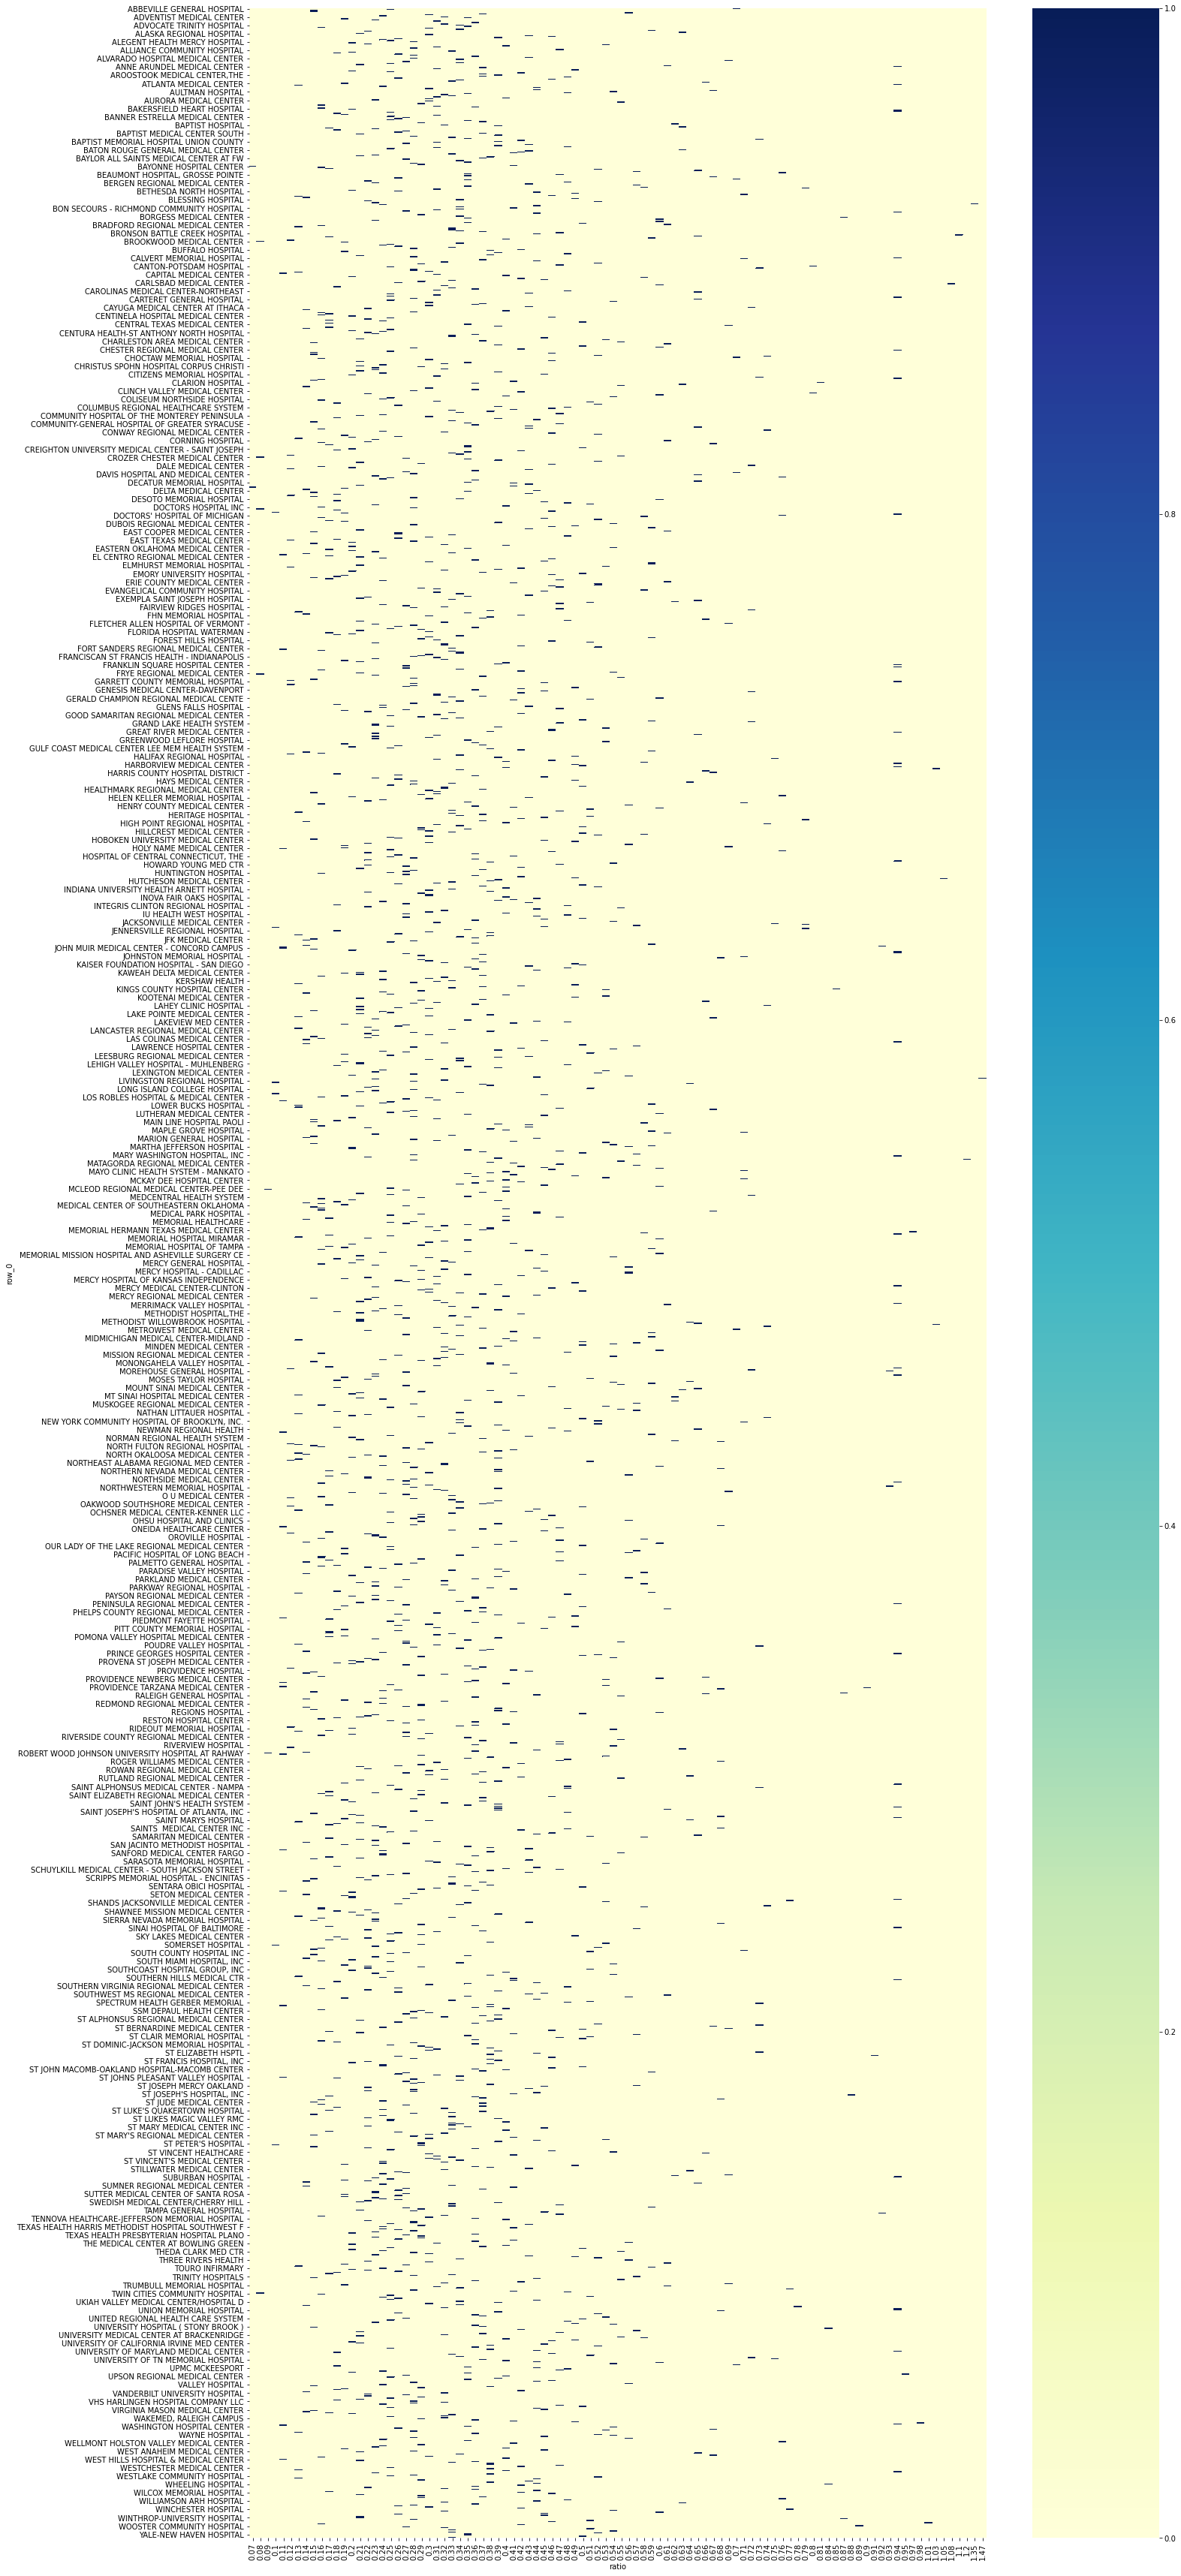

In [57]:
providers_avg_charges=df[filter].groupby('Provider Name')[' Average Covered Charges '].mean()

providers_avg_payments=df[filter].groupby('Provider Name')[' Average Total Payments '].mean()


result=pd.DataFrame({'Avg Charges':providers_avg_charges,'Avg Payments': providers_avg_payments})

#for key,item in result.iterrows():
#    print(key,item['Avg Charges'])

#print(result)
result['ratio']=[round(row['Avg Payments']/row['Avg Charges'],2) for key, row in result.iterrows()]
sns.regplot(data=result,x='Avg Charges',
       y='Avg Payments', order=2)
plt.show()

fig,ax=plt.subplots(figsize=(22,62))
pd_crosstab= pd.crosstab(result.index, result['ratio'])
sns.heatmap(pd_crosstab,cmap='YlGnBu')
plt.show()


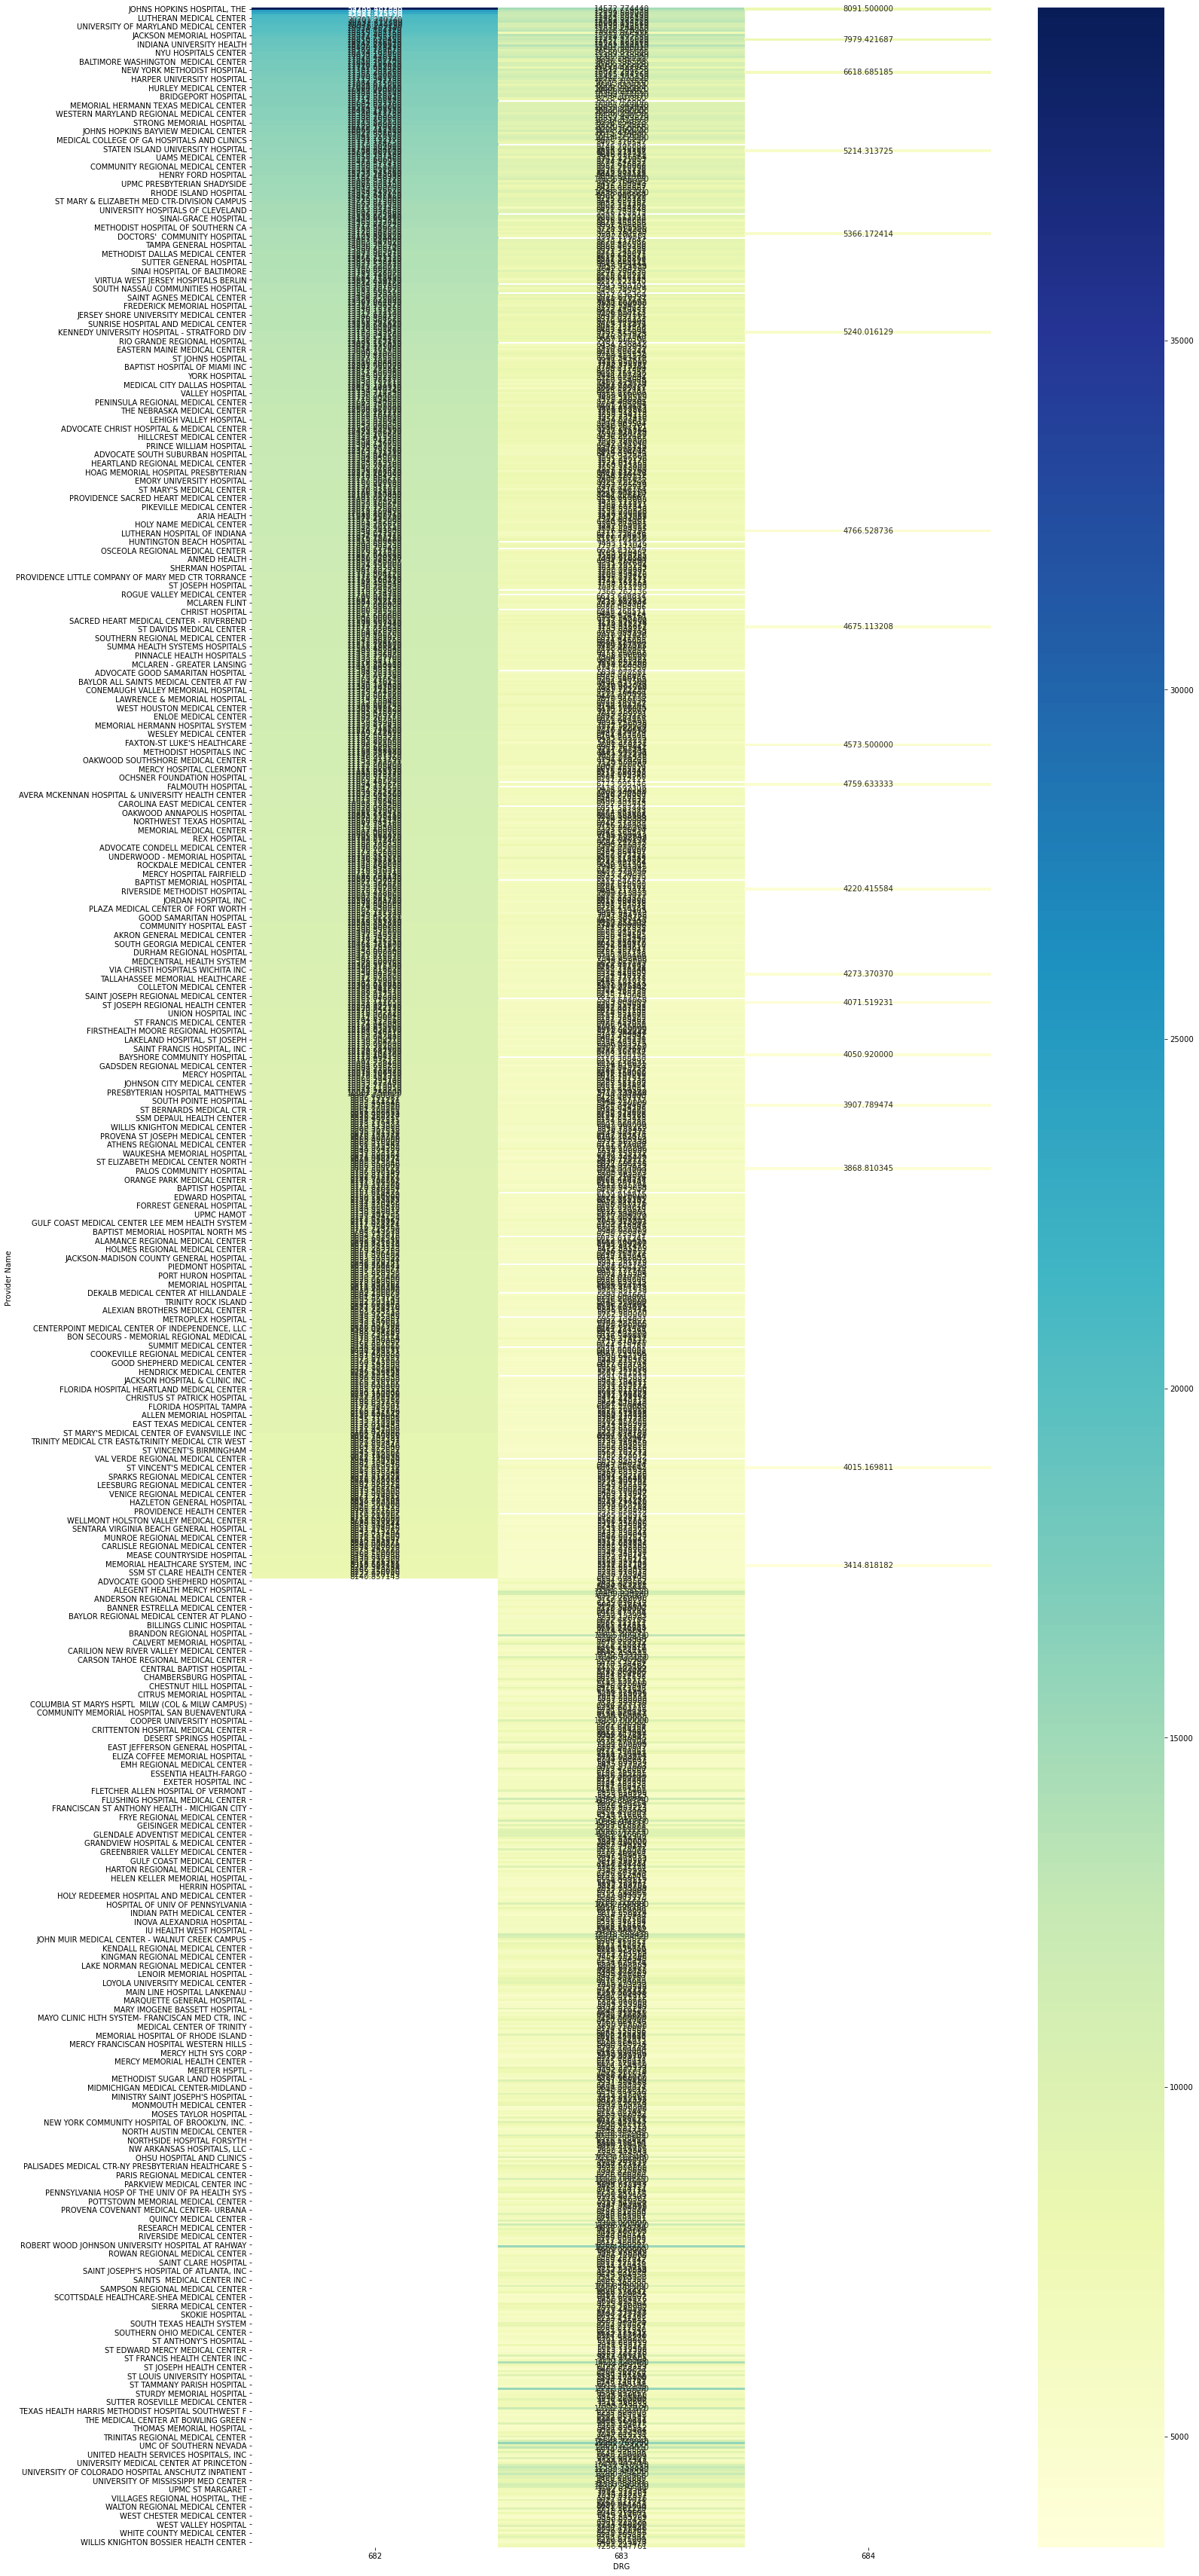

In [58]:
filter =(df['DRG'].isin(['682','683','684'])) & (df[' Total Discharges ']>=50)

result=df[filter]
ct=pd.crosstab(result['Provider Name'],result['DRG'],
values=result[' Average Total Payments '], aggfunc='mean')

ct=ct.sort_values(by='682', ascending=False)
#print(ct)

fig,ax=plt.subplots(figsize=(22,62))
sns.heatmap(ct,annot=True,fmt='f',
cmap='YlGnBu', cbar=True, ax=ax)

#plt.yticks(rotation=0)
#plt.xticks(rotation=90)

plt.show()

<AxesSubplot:>

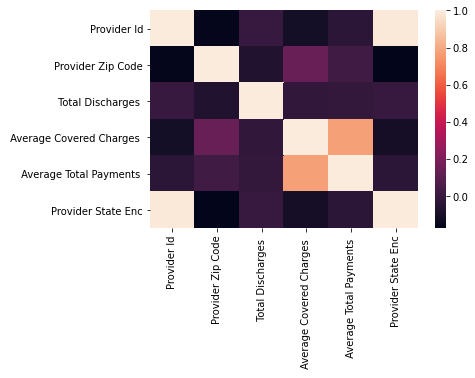

In [59]:

sns.heatmap(df.corr())

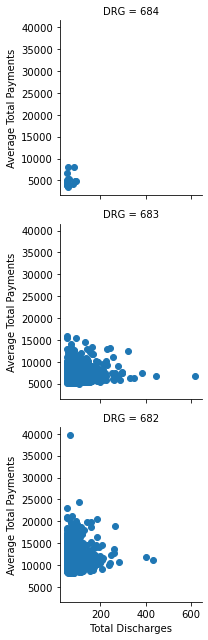

<Figure size 432x288 with 0 Axes>

In [60]:
# Create a FacetGrid varying by column and columns ordered with the degree_order variable
g = sns.FacetGrid(df[filter], row="DRG", row_order=['684','683','682'])

# Map a scatter plot of Undergrad Population compared to PCTPELL
g.map(plt.scatter, ' Total Discharges ', ' Average Total Payments ')

plt.show()
plt.clf()

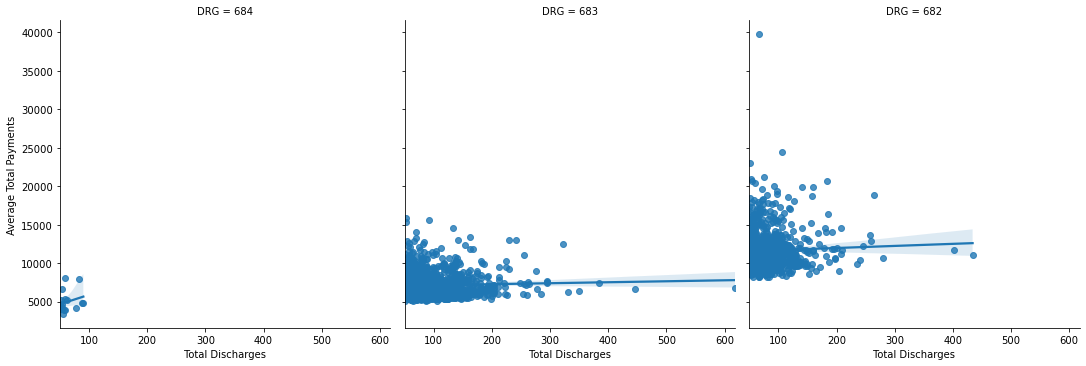

<Figure size 432x288 with 0 Axes>

In [61]:
# Re-create the plot above as an lmplot
sns.lmplot(data=df[filter],
        x=' Total Discharges ',
        y=' Average Total Payments ',
        col="DRG",
        col_order=['684','683','682'])

plt.show()
plt.clf()



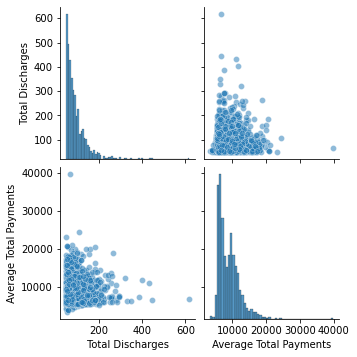

<Figure size 432x288 with 0 Axes>

In [62]:
sns.pairplot(data=df[filter],
        vars=[' Total Discharges ',' Average Total Payments '],
        palette='husl', plot_kws={'alpha':0.5})

plt.show()
plt.clf()

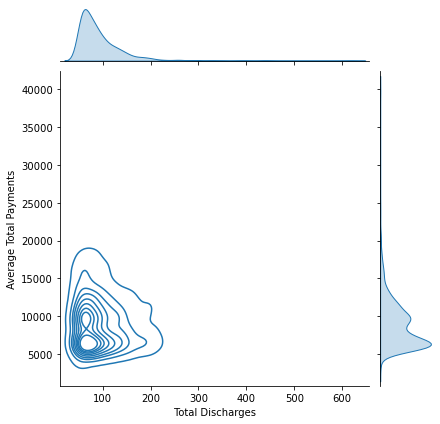

In [63]:
#g=sns.JointGrid(data=df[filter], x=' Total Discharges ', y=' Average Total Payments ')
#g.plot(sns.regplot, sns.distplot)
#plt.show()

g=sns.JointGrid(data=df[filter], x=' Total Discharges ', y=' Average Total Payments ')
g=g.plot_joint(sns.kdeplot)
g=g.plot_marginals(sns.kdeplot, shade=True)
#g=g.annotate(stats.pearsonr)

plt.show()

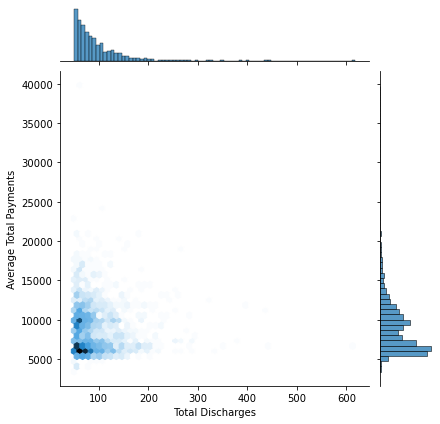

In [64]:
g=sns.jointplot(data=df[filter], x=' Total Discharges ', y=' Average Total Payments ', kind='hex')
plt.show()

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\axisgrid.py:2036: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)


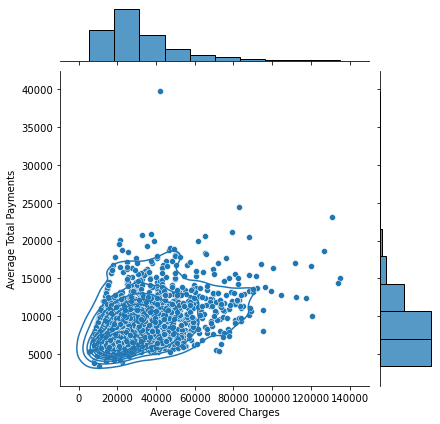

<Figure size 432x288 with 0 Axes>

In [65]:
# Create a jointplot of temp vs. casual riders
# Include a kdeplot over the scatter plot
g = (sns.jointplot(x=" Average Covered Charges ",
             y=" Average Total Payments ",
             kind='scatter',
             data=df[filter],
             marginal_kws=dict(bins=10, rug=True))
    .plot_joint(sns.kdeplot))
    
plt.show()
plt.clf()

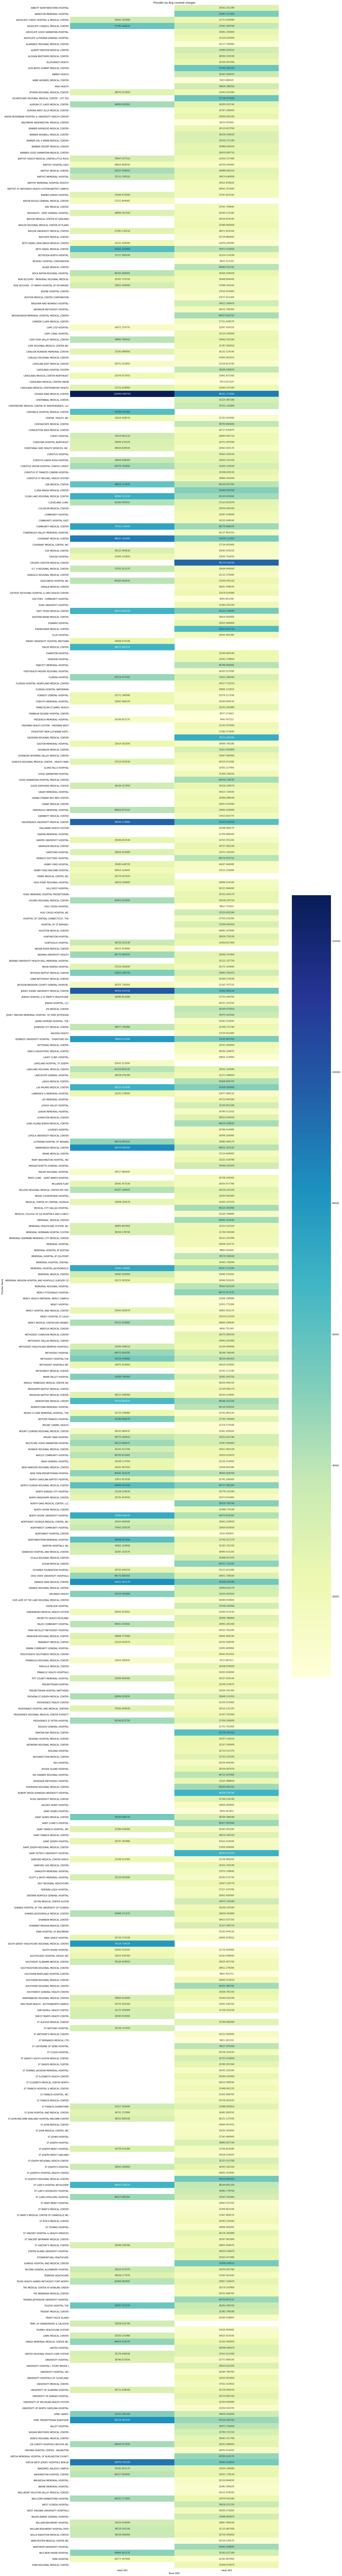

In [112]:
filter =(df['DRG'].isin(['682','683','684'])) & (df[' Total Discharges ']>=100)
#filter =(df['DRG'].isin(['682','683','684'])) & (df[' Total Discharges ']>=1000)
data=df[filter]
pd_crosstab= pd.crosstab(data['Provider Name'],data['DRG'], data[' Average Covered Charges '],aggfunc={'mean'})
fig,ax=plt.subplots(figsize=(22,222))
plt.title("Provider by Avg covered charges")
sns.heatmap(data=pd_crosstab,cmap='YlGnBu',annot=True,fmt='f',cbar=True,ax=ax)
plt.show()

